In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#pip install seaborn

In [4]:
data = pd.read_csv('hypothyroid.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
data.isnull().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [7]:
data.describe()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,...,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [8]:

# Replace placeholders and convert to NaN
data.replace('?', np.nan, inplace=True)
#data.replace('f', np.nan, inplace=True)

C:\Users\babar\AppData\Local\Temp\ipykernel_13464\3872464294.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('?', np.nan, inplace=True)


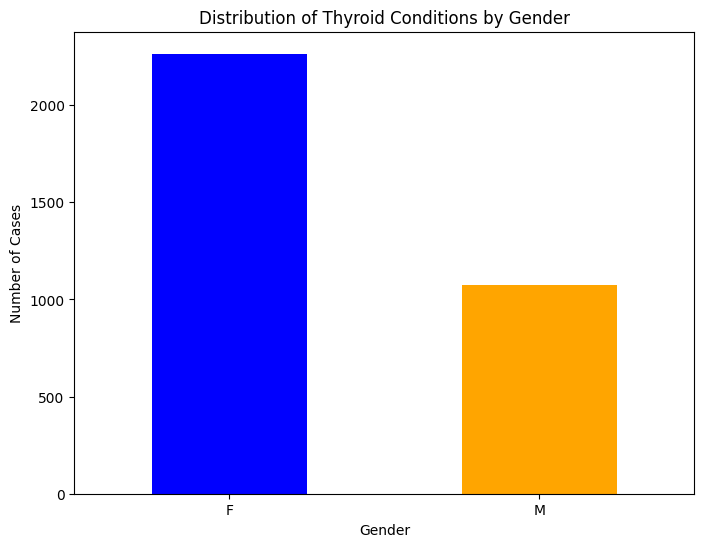

In [9]:
# Filter data for those with thyroid condition (binaryClass == 'P')
thyroid_data = data[data['binaryClass'] == 'P']

# Aggregate by sex
sex_counts = thyroid_data['sex'].value_counts()

# Plot the data
plt.figure(figsize=(8, 6))
sex_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Thyroid Conditions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.show()

In [10]:
data.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [11]:
data.size

113160

In [12]:
 data.shape

(3772, 30)

In [13]:
data= data.drop(columns=['TBG'])

In [14]:
data['binaryClass'].unique()

array(['P', 'N'], dtype=object)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3622 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [16]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')

In [17]:
data['age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3772 entries, 0 to 3771
Series name: age
Non-Null Count  Dtype  
--------------  -----  
3771 non-null   float64
dtypes: float64(1)
memory usage: 29.6 KB


In [18]:
# Convert other potentially numeric columns to numeric types
numeric_columns = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [19]:
# Fill missing numeric values with the mean of each column
for column in ['age'] + numeric_columns:
    data[column].fillna(data[column].mean(), inplace=True)

C:\Users\babar\AppData\Local\Temp\ipykernel_13464\1905287071.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


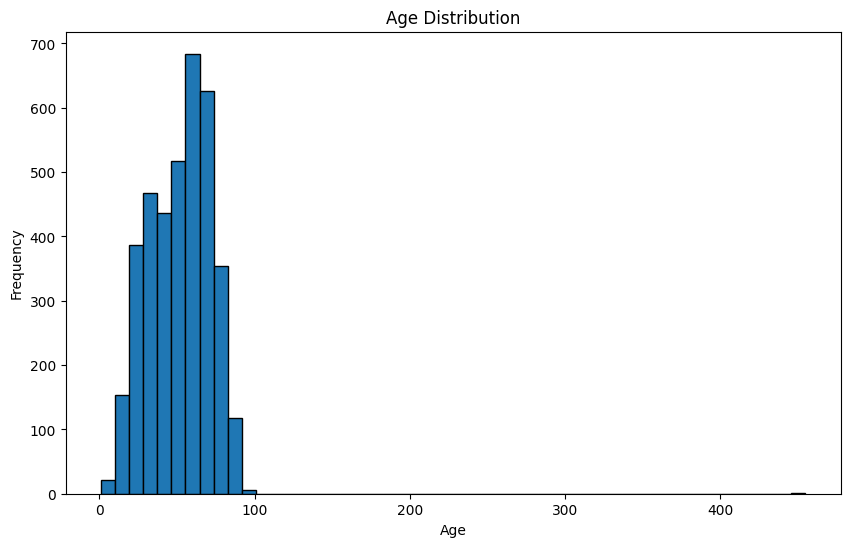

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=50, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
# plt.grid(True)
plt.show()


In [21]:
data = pd.get_dummies(data, columns=['sex', 'referral source'], drop_first=True)

# Binary encoding for 'binaryClass'
data['binaryClass'] = data['binaryClass'].map({'P': 1, 'N': 0})


In [22]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        data[i].fillna(data[i].mean(),inplace = True)

In [23]:
##### Handle missing valuesm
# For categorical variables, we can impute missing values with the mode
# For numerical variables, we can impute missing values with the mean or median
# Here, let's use mode for categorical variables and median for numerical variables

In [24]:
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(exclude=['object']).columns

In [25]:
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])
data[num_cols] = data[num_cols].fillna(data[num_cols].median())

In [26]:
# Encode categorical variables
data = pd.get_dummies(data, columns=cat_cols)

In [27]:
# Split the data into features and target
X = data.drop(columns=['binaryClass'])
y = data['binaryClass']

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [29]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:

# Step 2: Define preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [31]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [32]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [34]:
# Step 3: Define ANN classifier
classifier = MLPClassifier(random_state=42)


In [35]:
# Step 4: Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

In [36]:
# Step 5: Train the model
pipeline.fit(X_train, y_train)


d:\thyroid\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', MLPClassifier(random_state=42))])

In [37]:
# Step 6: Evaluate the model
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

In [38]:

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9781239642028505
Test Accuracy: 0.9748344370860927


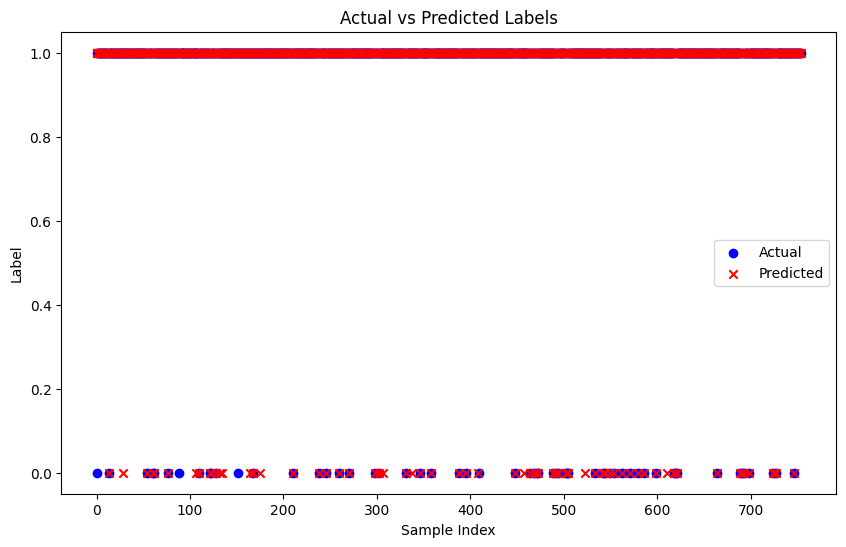

In [39]:
import matplotlib.pyplot as plt

# Step 7: Predictions
y_pred = pipeline.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', marker='o')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()